## TEAM ARMSTERDAM 

In [6]:
import gradio as gr

import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from wordcloud import WordCloud
from nltk.tokenize import word_tokenize
from collections import Counter

# linear algebra
import numpy as np 

# data processing
import pandas as pd 

# For creating plots
import seaborn as sns 

# For specifying the axes tick format
import matplotlib.ticker as mtick  
import matplotlib.pyplot as plt

sns.set(style = 'white')


import os
from sklearn import preprocessing

#data split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler


#Evaluation Metrics
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import accuracy_score

import warnings
warnings.filterwarnings('ignore')

## Dataset Importation

In [7]:
# Load the train and test datasets
train_data = pd.read_csv("Train.csv")
test_data = pd.read_csv("Test.csv")

In [8]:
train_data.head()

,tweet_id,safe_text,label,agreement
0,CL1KWCMY,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,E3303EME,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,M4IVFSMS,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,1DR6ROZ4,I mean if they immunize my kid with something ...,-1.0,1.0
4,J77ENIIE,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


In [9]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10001 entries, 0 to 10000
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   tweet_id   10001 non-null  object 
 1   safe_text  10001 non-null  object 
 2   label      10000 non-null  float64
 3   agreement  9999 non-null   float64
dtypes: float64(2), object(2)
memory usage: 312.7+ KB


In [10]:
train_data.shape

(10001, 4)

## Data Cleaning 

Let's explore the data to see if there are any missing values

In [11]:
train_data.dtypes

tweet_id      object
safe_text     object
label        float64
agreement    float64
dtype: object

## checking for missing values

In [12]:
train_data.isnull().sum()

tweet_id     0
safe_text    0
label        1
agreement    2
dtype: int64

## Removing missing values

In [13]:
#Removing missing values 
train_data.dropna(inplace = True)

In [14]:
train_data.isnull().sum()

tweet_id     0
safe_text    0
label        0
agreement    0
dtype: int64

## Removing Tweet ID

In [15]:
# Remove customer IDs from the data set
train_data = train_data .iloc[:,1:]

In [16]:
train_data.head()

,safe_text,label,agreement
0,Me &amp; The Big Homie meanboy3000 #MEANBOY #M...,0.0,1.0
1,I'm 100% thinking of devoting my career to pro...,1.0,1.0
2,"#whatcausesautism VACCINES, DO NOT VACCINATE Y...",-1.0,1.0
3,I mean if they immunize my kid with something ...,-1.0,1.0
4,Thanks to <user> Catch me performing at La Nui...,0.0,1.0


# EXPLORATORY DATA ANALYSIS

1. Class Distribution Analysis:
   - Examine the distribution of the "label" column to understand the balance between different classes (e.g., positive, negative, neutral, etc.). Visualize this distribution using bar plots or pie charts.

2. Agreement Analysis:
   - Investigate the "agreement" column to understand the level of agreement between annotators or classifiers. Analyze the distribution of agreement scores and determine if there are discrepancies or inconsistencies. Visualize this distribution using histograms or box plots.

3. Text Length Analysis:
   - Explore the length of the "safe_text" column (number of characters or words). Calculate summary statistics such as mean, median, minimum, maximum, and standard deviation. Plot histograms or box plots to visualize the distribution of text lengths.

4. Word Frequency Analysis:
   - Identify the most frequent words or terms in the "safe_text" column. Generate a word cloud or bar chart to visualize the top N words. This analysis can provide insights into the most commonly used language in the dataset.

Class Distribution Analysis

Examine the distribution of the "label" column to understand the balance between different classes (e.g., positive, negative, neutral)

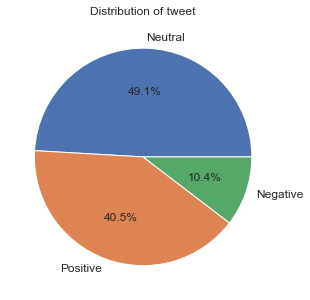

In [43]:
ax = (train_data['label'].value_counts()*100.0 /len(train_data))\
.plot.pie(autopct='%.1f%%', labels = ['Neutral', 'Positive', 'Negative'],figsize =(5,5), fontsize = 12 )                                                                           
ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('',fontsize = 12)
ax.set_title('Distribution of tweet', fontsize = 12)

plt.show()

Agreement Analysis:

Investigate the "agreement" column to understand the level of agreement between annotators or classifiers. Analyze the distribution of agreement scores and determine if there are discrepancies or inconsistencies.

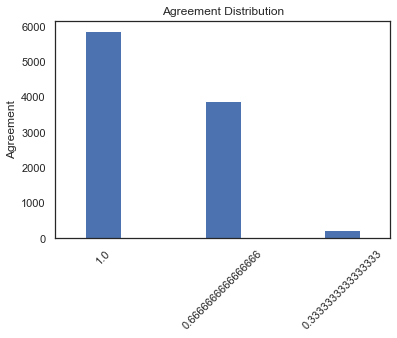

In [45]:
ax = train_data['agreement'].value_counts().plot(kind = 'bar',rot = 45, width = 0.3)
ax.set_ylabel('Agreement')
ax.set_title('Agreement Distribution')

plt.show()

Text Length Analysis

Explore the length of the "safe_text" column (number of characters or words).

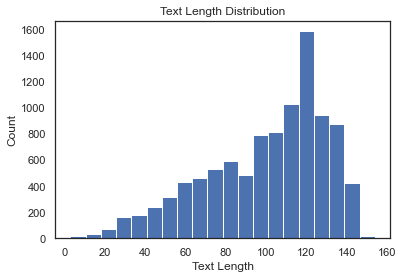

In [24]:
# Calculate the length of each text
train_data['text_length'] = train_data['safe_text'].apply(lambda x: len(x))

# Plot the text length distribution
plt.hist(train_data['text_length'], bins=20)
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.title('Text Length Distribution')
plt.show()


Word Frequency Analysis

Identify the most frequent words or terms in the "safe_text" column. This analysis can provide insights into the most commonly used language in the dataset.

In [41]:

# Combine all the texts into a single string
all_text = ' '.join(train_data['safe_text'])

# Tokenize the text into individual words
tokens = word_tokenize(all_text)

# Count the frequency of each word
word_freq = Counter(tokens)

# Get the top 10 most used words
top_10_words = word_freq.most_common(10)

# Print the top 10 words and their frequencies
for word, freq in top_10_words:
    print(f"Word: {word}\tFrequency: {freq}")


Word: <	Frequency: 10229
Word: >	Frequency: 10229
Word: .	Frequency: 5968
Word: user	Frequency: 5595
Word: #	Frequency: 5557
Word: url	Frequency: 4634
Word: ,	Frequency: 3586
Word: to	Frequency: 3436
Word: the	Frequency: 3420
Word: measles	Frequency: 2518


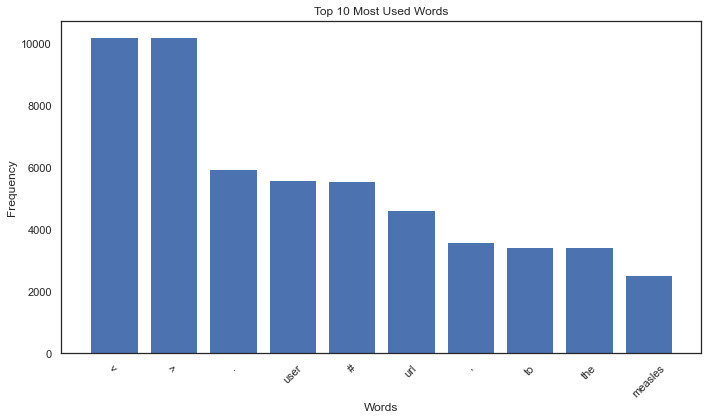

In [42]:
# Combine all the texts into a single string
all_text = ' '.join(train_data['safe_text'])

# Tokenize the text into individual words
tokens = word_tokenize(all_text)

# Count the frequency of each word
word_freq = Counter(tokens)

# Get the top 10 most used words and their frequencies
top_10_words = word_freq.most_common(10)

# Extract the words and frequencies for plotting
words = [word for word, freq in top_10_words]
frequencies = [freq for word, freq in top_10_words]

# Create a bar plot
plt.figure(figsize=(10, 6))
plt.bar(words, frequencies)
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.title('Top 10 Most Used Words')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Works on the roberta model

In [ ]:
Train, eval = train_test_split(Train, test_size=0.2, random_state=42, stratify= Train['label'])

In [ ]:
print(f"new dataframe shapes: train is {Train.shape}, eval is {eval.shape}")

In [ ]:
# Save splitted subsets
Train.to_csv("/content/drive/MyDrive/Tweets_data/Train.csv", index=False)
eval.to_csv("/content/drive/MyDrive/Tweets_data/Test.csv", index=False)

dataset = load_dataset('csv',
                        data_files={'Train': "/content/drive/MyDrive/Tweets_data/Train.csv",
                        'eval': "/content/drive/MyDrive/Tweets_data/Train.csv"}, encoding = "ISO-8859-1")

In [ ]:
# Instantiate the tokenizer
tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment", num_labels=3)

In [ ]:
## Function to transform labels
def transform_labels(label):

    label = label['label']
    num = 0
    if label == -1: #'Negative'
        num = 0
    elif label == 0: #'Neutral'
        num = 1
    elif label == 1: #'Positive'
        num = 2

    return {'labels': num}

In [ ]:
## Function to tokenize data
def tokenize_data(example):
    return tokenizer(example['safe_text'], padding='max_length',truncation=True, max_length = 256)

In [ ]:
# Tokenize the tweets
dataset = dataset.map(tokenize_data, batched=True)

In [ ]:
# Transform	labels and limit the columns
remove_columns = ['tweet_id', 'label', 'safe_text', 'agreement']
dataset = dataset.map(transform_labels, remove_columns=remove_columns)

In [ ]:
pip install accelerate -U

In [ ]:
pip install transformers[torch]

In [ ]:
pip show accelerate

In [ ]:
# Define training arguments
training_args = TrainingArguments(
    "covid_tweets_sentiment_analysis_model",
    num_train_epochs=4,
    load_best_model_at_end=True,
    evaluation_strategy="epoch",
    save_strategy="epoch"
    )

In [ ]:
# Load the pretrained model
from transformers import AutoModelForSequenceClassification
model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment", num_labels=3)

In [ ]:
# Define evaluation metrics
metric = load_metric("accuracy")

def compute_metrics(eval_pred):
    logits, labels = eval_pred
    predictions = np.argmax(logits, axis=-1)
    return metric.compute(predictions=predictions, references=labels)

In [ ]:
# Instantiate the training and evaluation sets
train_dataset = dataset["Train"].shuffle(seed=24)
eval_dataset = dataset["eval"].shuffle(seed=24)

In [ ]:
#converting training data to PyTorch tensors to speed up training and adding padding:
from transformers import DataCollatorWithPadding
data_collator = DataCollatorWithPadding(tokenizer=tokenizer)

In [ ]:
# Reinstantiate the trainer for evaluation
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_dataset,
    eval_dataset=eval_dataset,
    tokenizer=tokenizer,
    data_collator=data_collator,
    compute_metrics=compute_metrics,
)

In [ ]:
# Launch the final evaluation
trainer.evaluate()